# Chapter7-1

## 要約生成

今回はニュース記事から見出しを生成するモデルの訓練、評価に使われるデータセットを使い、その中身を分析する

### ライブラリのインストール

In [ ]:
!pip install datasets transformers[ja,torch] sentencepiece japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

### データセットのダウンロード

In [ ]:
from datasets import load_dataset

# データセットの読み込み
dataset = load_dataset("llm-book/livedoor-news-corpus")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for llm-book/livedoor-news-corpus contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/llm-book/livedoor-news-corpus
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major relea

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# データセットの確認
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 5893
    })
    validation: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 736
    })
    test: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 738
    })
})


In [ ]:
from pprint import pprint

# 学習セットの最初の2つの事例を表示
pprint(list(dataset["train"])[:2])

[{'category': 'livedoor-homme',
  'content': '日常の何気ない気持ちをTwitterにつぶやいたり、実名登録のFacebookで懐かしい友人と再会したり、SNSはもはや我々の生活において欠かせない存在となりつつある。先日、国内の月間利用者数が1,000万人を突破し、mixi（1,520万人、2011年12月現在）を追い抜くのも時間の問題と思われるFacebookでは、診断やゲームなど様々なアプリが生まれ、ユーザーのタイムラインを今日も賑わしている。しかし、その一方で、Facebookを悪用するケースもまた徐々に増え始めている。  '
             'Facebookでは、2008年1月にAPIが公開されて以来、様々なアプリが誕生しているが、同年8月にはボット型の不正プログラム「KOOBFACE」が確認され、感染を広げた。その手口とは、「あなたがビデオに出ていますよ！」というメッセージが届き、YouTubeに偽装したURLにアクセスすると、動画再生のためにプログラムのインストールを求められ、不正プログラムをダウンロードさせるというもの。  '
             '不正プログラムには、画面に偽の感染警告を表示し、駆除のための偽セキュリティソフトを購入させ、クレジットカード情報などの個人情報を盗むものや、ブラウザでログイン時のアカウント情報を盗むものなどが存在。更に、そのユーザーのFacebookフレンド宛にも不正なメッセージを自動送信することによって、感染規模を拡大していくのだ。  '
             '2010年12月にはFacebookの公式アカウントを騙り、不正プログラムをインストールさせようとするスパムメールや、2011年1月にはアカウントの更新に必要として、個人情報を盗むフィッシングサイトを確認。その他にも、可愛らしい女性のプロフィール画像を載せた人物から好意的なメッセージが届き、携帯アドレスへの連絡を求めるスパムメッセージなど、その手口は年々多様化している。  '
             'Facebookのみならず、今年1月にはTwitter公式アカウントを騙るフィッシング詐欺サイトも確認され、昨年12月の警察庁による発表では、SNS以外にもフィッシング詐欺で約2,000万円、不正

この時点で記事の本文から見出しを生成できそうか判断することが重要。

抽出型要約、生成型要約のどちらでタスクを解くのがいいのかを検討する

上記の場合、記事から見出しを生成する際に、言い換えを求められるため生成型要約を使用するのがよい

### データセットの分析

In [ ]:
from collections import Counter

# 各カテゴリの事例数を確認
pprint(Counter(dataset["train"]["category"]).most_common())

[('sports-watch', 731),
 ('it-life-hack', 718),
 ('dokujo-tsushin', 695),
 ('smax', 690),
 ('movie-enter', 689),
 ('peachy', 677),
 ('kaden-channel', 656),
 ('topic-news', 616),
 ('livedoor-homme', 421)]


In [ ]:
# 各カテゴリの見出しの事例を確認

categories = set()

for data in dataset["train"]:
  category, title = data["category"], data["title"]

  # すでに出現したカテゴリはスキップ
  if category not in categories:
    categories.add(category)
    print(f"{category}: {title}")

livedoor-homme: 急成長を遂げるFacebookに忍び寄る影
it-life-hack: いつでもどこでも自分専用環境！　Ubuntu起動ができるUSBメモリーを作成！【デジ通】
kaden-channel: 「PS Vita」がついに発売　—　初日は待ちわびたファンが行列を作る大盛況【話題】
smax: ソニーモバイル、Xperia ionのLTE非対応版「Xperia ion HSPA」を発表
peachy: 【終了しました】リムジンでお買い物の後はスイートルームで“うっとろりん”、お姫さまのような1日をプレゼント
movie-enter: 有言実行の男、ジュード・ロウが自信作を引っ提げ来日決定
dokujo-tsushin: 言いにくい「芸能人の○○みたいにして」の一言
sports-watch: 日本代表敗戦、セルジオ越後氏は「ベストメンバーでなければこの程度」
topic-news: 「柏木はブタ鼻」嫉妬ややっかみからAKB48で流行るイジメごっこ


上記の結果から文字数の大きく異なるカテゴリ、スタイルが顕著に異なるカテゴリはないことが確認できる。

### 記事と見出しの長さの分布を確認

モデルへ入力する記事が長すぎると、その一部を切り捨てる必要がある。

$\rightarrow$どのくらいのトークンを切り捨てるか把握しておく

tokenizer_config.json:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
100%|██████████| 5893/5893 [00:17<00:00, 330.06it/s]


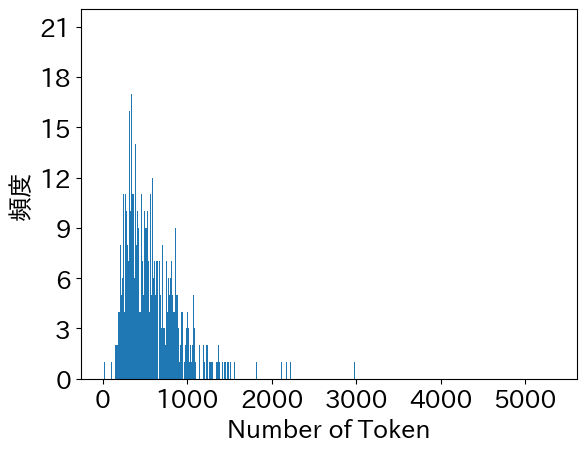

100%|██████████| 5893/5893 [00:02<00:00, 2496.12it/s]


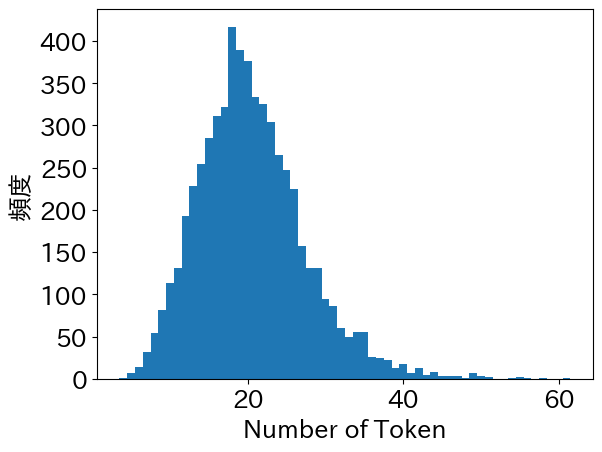

In [ ]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from tqdm import tqdm
from transformers import AutoTokenizer, PreTrainedTokenizer

# フォントサイズの変更
plt.rcParams["font.size"] = 18

def visualize_num_tokens_distribution(
    dataset: Dataset, tokenizer: PreTrainedTokenizer, column: str
) -> None:
  """ トークン数の分布を可視化 """

  # 各事例でトークン数をカウント、トークン数ごとに結果を集約
  counter = Counter()

  for data in tqdm(dataset):
    num_tokens = len(tokenizer.tokenize(data[column]))
    counter[num_tokens] += 1

  # トークン数の分布を可視化
  plt.bar(counter.keys(), counter.values(), width=1.0)
  plt.xlabel("Number of Token")
  plt.ylabel("頻度")
  plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
  plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
  plt.show()

# トークナイザーの読み込み
model_name = "retrieva-jp/t5-base-long"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 記事のトークン数の分布を可視化
visualize_num_tokens_distribution(
    dataset["train"], tokenizer, "content"
)

# 見出しのトークン数の分布を可視化
visualize_num_tokens_distribution(
    dataset["train"], tokenizer, "title"
)

モデルの入力トークン数の限界である512を超えているものも多数存在している